In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

RECOVERED_URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
CONFIRMED_URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

global_recovered_csv = requests.get(RECOVERED_URL).content.decode('utf-8')
global_confirmed_csv = requests.get(CONFIRMED_URL).content.decode('utf-8')

df_recovered = pd.read_csv(io.StringIO(global_recovered_csv)).drop(['Lat', 'Long'], axis=1)
df_confirmed = pd.read_csv(io.StringIO(global_confirmed_csv)).drop(['Lat', 'Long'], axis=1)

In [2]:
COUNTRY = 'Italy'

df_recovered = df_recovered.groupby('Country/Region').sum().T.rename_axis('Date', axis=1)[COUNTRY]
df_confirmed = df_confirmed.groupby('Country/Region').sum().T.rename_axis('Date', axis=1)[COUNTRY]

df_recovered.index = pd.to_datetime(df_recovered.index)
df_confirmed.index = pd.to_datetime(df_confirmed.index)

df_recovered = df_recovered.asfreq('d')
df_confirmed = df_confirmed.asfreq('d')

In [3]:
def decumulation(df):
    return df.sub(df.shift()).iloc[1:]

In [4]:
df_daily_recovered = decumulation(df_recovered)
df_daily_confirmed = decumulation(df_confirmed)

In [5]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_auto_correlation(df, diff=0, ax=None):
    for _ in range(diff):
        df = df.diff().dropna()
    plot_acf(df, ax=ax, title="Order of differencing: {}".format(diff)) 

print("p-value daily confirmed:", adfuller(df_daily_confirmed)[1])

p-value daily confirmed: 0.1329788815092277


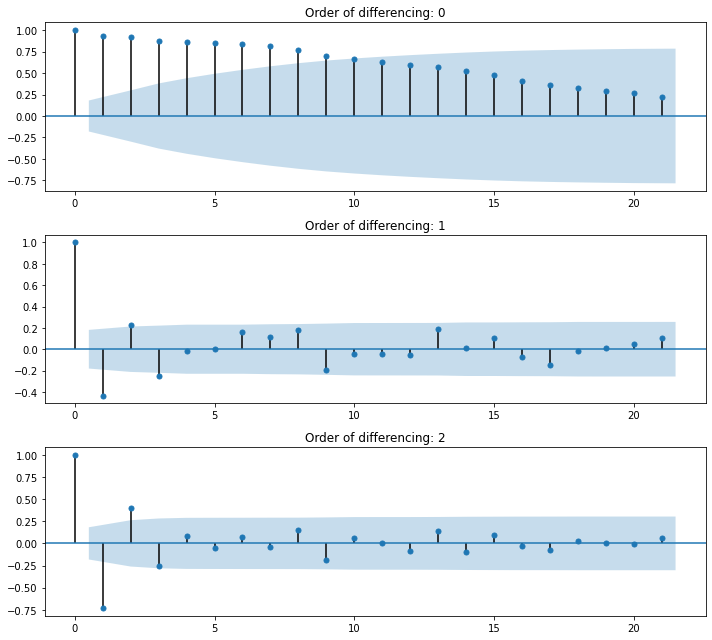

In [6]:
_, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

for i, ax in enumerate(ax.flatten()):
    plot_auto_correlation(df_daily_confirmed, diff=i, ax=ax)

plt.tight_layout()

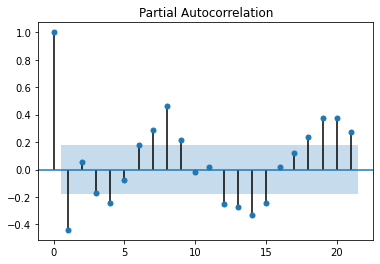

In [7]:
p = plot_pacf(df_daily_confirmed.diff().dropna())

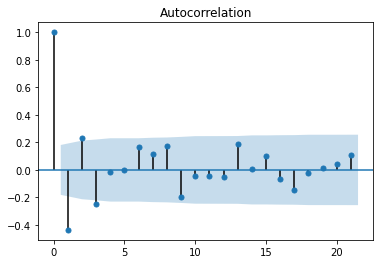

In [8]:
q = plot_acf(df_daily_confirmed.diff().dropna())

In [9]:
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

model = ARIMA(df_daily_confirmed, order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Italy   No. Observations:                  117
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -918.831
Method:                       css-mle   S.D. of innovations            622.271
Date:                Wed, 20 May 2020   AIC                           1845.661
Time:                        17:23:09   BIC                           1856.710
Sample:                    01-24-2020   HQIC                          1850.147
                         - 05-19-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1218     43.358      0.141      0.888     -78.858      91.101
ar.L1.D.Italy    -0.5877      0.176     -3.331      0.001      -0.934      -0.242
ma.L1.D.Italy     0.1945      0.218      0.892      0.372      -0.233       0.622
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7014           +0.0000j            1.7014            0.5000
MA.1           -5.1414           +0.0000j            5.1414            0.5000
-----------------------------------------------------------------------------
"""

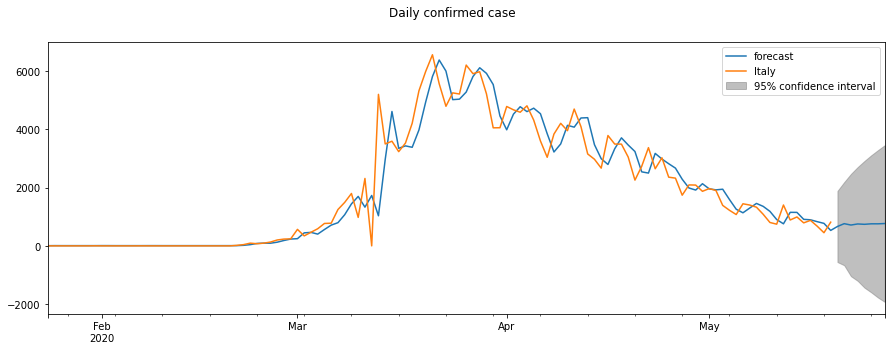

In [10]:
_, ax = plt.subplots(figsize=(15,5))
x = model_fit.plot_predict(end=125, ax=ax).suptitle('Daily confirmed case')

In [11]:
print("p-value daily recovered:", adfuller(df_daily_recovered)[1])

p-value daily recovered: 0.973130273649359


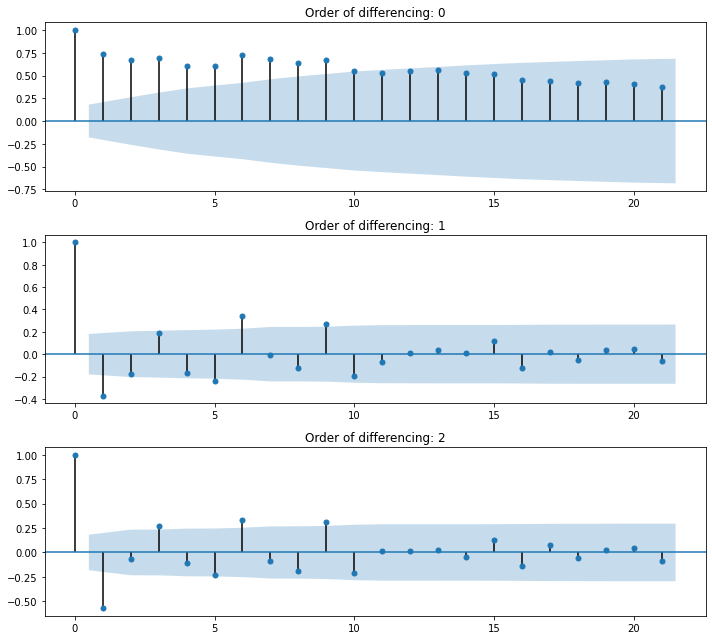

In [12]:
_, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

for i, ax in enumerate(ax.flatten()):
    plot_auto_correlation(df_daily_recovered, diff=i, ax=ax)

plt.tight_layout()

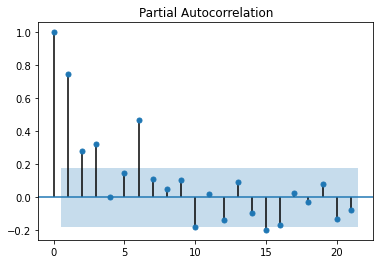

In [13]:
p = plot_pacf(df_daily_recovered)

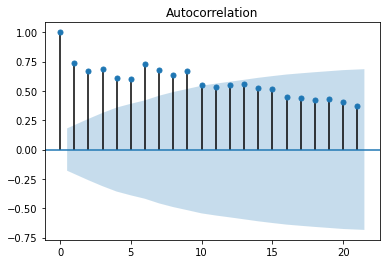

In [14]:
q = plot_acf(df_daily_recovered)

In [15]:
model = ARIMA(df_daily_confirmed, order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Italy   No. Observations:                  117
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -918.831
Method:                       css-mle   S.D. of innovations            622.271
Date:                Wed, 20 May 2020   AIC                           1845.661
Time:                        17:23:10   BIC                           1856.710
Sample:                    01-24-2020   HQIC                          1850.147
                         - 05-19-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1218     43.358      0.141      0.888     -78.858      91.101
ar.L1.D.Italy    -0.5877      0.176     -3.331      0.001      -0.934      -0.242
ma.L1.D.Italy     0.1945      0.218      0.892      0.372      -0.233       0.622
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7014           +0.0000j            1.7014            0.5000
MA.1           -5.1414           +0.0000j            5.1414            0.5000
-----------------------------------------------------------------------------
"""

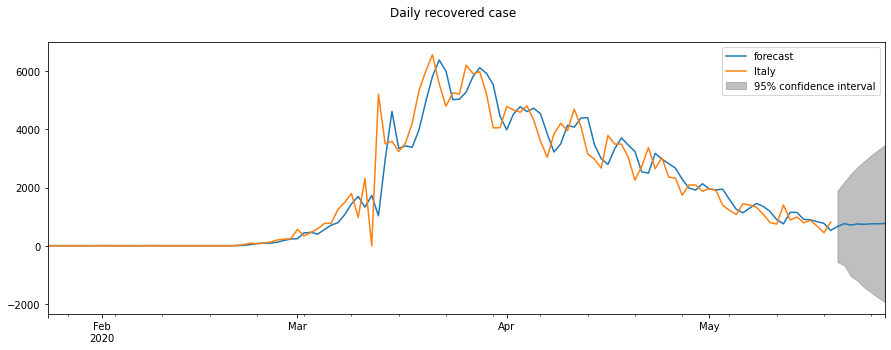

In [16]:
_, ax = plt.subplots(figsize=(15,5))
x = model_fit.plot_predict(end=125, ax=ax).suptitle('Daily recovered case')